**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel('./Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Feature Engineering 

In [3]:
# cancelled orders starts with C in InvoceNo
cancelled_orders= df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [4]:
cancelled_orders.shape

(9288, 8)

Cancelled orders with negative quantity and negative unit price

In [5]:
print("percentage of cancelled orders", round(len(cancelled_orders)/len(df)*100,2),'%')

percentage of cancelled orders 1.71 %


In [6]:
# rows with 0 unit price
df[df['UnitPrice']==0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [7]:
df[df['UnitPrice']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


so there are some transaction which are not cancelled howerver they have `0` price

**Removing transactions with `Unit Price <= 0`  and `Quantity >0`** 

In [8]:
# keeping only +ve unitprice and quantity
data= df[(df['UnitPrice']>0) & (df['Quantity']>0)]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


**Removing duplicate values as they don't add any information to system**

In [10]:
print('Percentage of duplicate value',round(len(data[data.duplicated()])/len(data)*100,2),'%')

Percentage of duplicate value 0.99 %


In [11]:
data.drop_duplicates(inplace=True)

In [12]:
#drop rows have missing customerID 
data = data.dropna(subset=['CustomerID'])

**Converting description to lower case**  
- As description can be written in different cases so converting all description into lowercase()
- removing punctuation

In [13]:
data['Description']= data['Description'].str.lower()

In [14]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
#removing punctutation
data['Description'] = data['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True)

In [16]:

print("Number of unique descriptions:", len(data['Description'].unique().tolist()))

Number of unique descriptions: 3867


**Stock code**  
Stock code should be numerical value so we will drop transactions which contains only multiple letters

In [17]:
data=data.loc[data['StockCode'].astype(str).str[0:4].str.isdigit()]

In [18]:
len(data['StockCode'].unique().tolist())

3659

**Dates**

In [19]:
data['month']=data['InvoiceDate'].dt.month
data['year']= data['InvoiceDate'].dt.year
data['hour']= data['InvoiceDate'].dt.hour
data['WeekDay']=data['InvoiceDate'].dt.day_name()
data['month_year']=data['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
#data['month_year'] = pd.to_datetime(data[['year', 'month']].assign(Day=1))
data['revenue'] = data['UnitPrice'] * data['Quantity']

In [20]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,hour,WeekDay,month_year,revenue
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,8,Wednesday,2010-12,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,8,Wednesday,2010-12,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,8,Wednesday,2010-12,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,8,Wednesday,2010-12,20.34
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,8,Wednesday,2010-12,20.34


In [39]:
plot = pd.DataFrame(data.groupby(['month_year'], as_index=False)['InvoiceNo'].count())
plot2 = pd.DataFrame(data.groupby(['WeekDay'])['InvoiceNo'].count())
#plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday'])
plot3 = pd.DataFrame(data.groupby(['hour'],as_index=False)['InvoiceNo'].count())
plot4 = pd.DataFrame(data.groupby(['month_year'],as_index=False)['revenue'].mean())
plot5 = pd.DataFrame(data.groupby(['month_year'], as_index=False)['revenue'].sum())

**Orders per month**


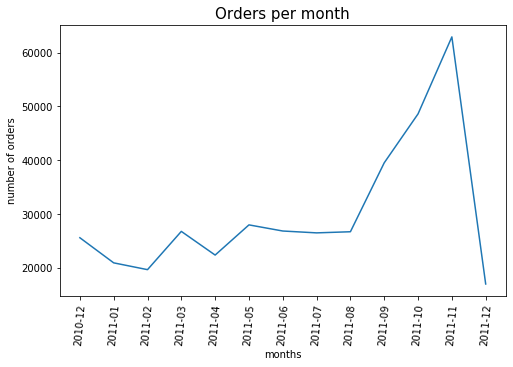

In [40]:
plt.figure(figsize=(8,5))
sns.lineplot(x="month_year", y="InvoiceNo", data = plot)
plt.xticks(rotation=85)
plt.title('Orders per month',fontsize=15)
plt.xlabel('months',fontsize=10)
plt.ylabel('number of orders',fontsize=10)
plt.show()

sales started increasing from september 2011 to october,2011. and started decline in Dec.  

**Orders per day**

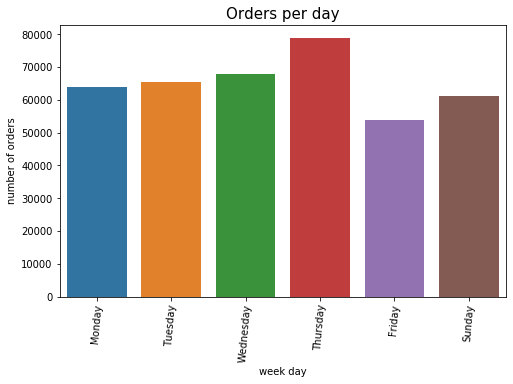

In [41]:
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x="WeekDay", y="InvoiceNo", data = plot2)
plt.xticks(rotation=85)
plt.title('Orders per day',fontsize=15)
plt.xlabel('week day',fontsize=10)
plt.ylabel('number of orders',fontsize=10)
plt.show()

many orders are placed in Thursday

**Orders per hour**

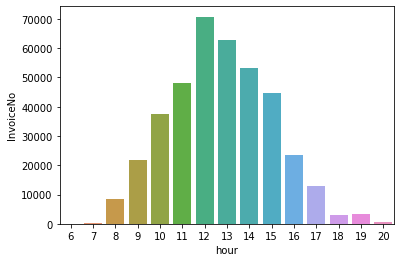

In [42]:
sns.barplot(x="hour", y="InvoiceNo", data = plot3)

**Highest revenue month**

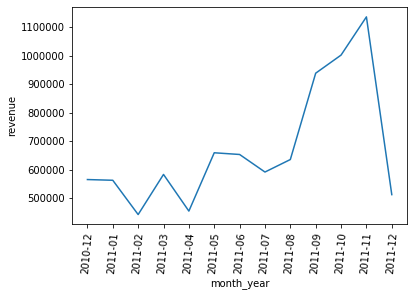

In [44]:
sns.lineplot(x = 'month_year', y='revenue', data = plot5)
plt.xticks(rotation=85)
plt.show()

**Price Distribution of expensive good**

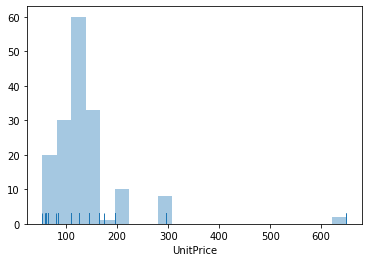

In [45]:
sns.distplot(data[data['UnitPrice']>50]['UnitPrice'], kde=False, rug=True);

**Transaction by countries**

In [57]:
customer_country=data[['Country','CustomerID']].drop_duplicates()

In [58]:
customer_country.groupby('Country', as_index=False)['CustomerID'].count().sort_values('CustomerID',ascending=False)

,Country,CustomerID
35,United Kingdom,3916
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


In [61]:
#transaction made by different countries
len(data['Country'].unique().tolist())

37

In [62]:
# number of rows with country =='Unspecified'
len(data[data['Country']=='Unspecified'])

241